In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplolib inline

In [8]:
train['source='] = 'train'
test['source'] = 'test'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train,test],ignore_index = False)

C:\Users\muralish\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [6]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


1.Which age group bought more?

2.Which City people bought more?

3.Which Gender bought more?

4.Married or unmarried?

5.Which product was the most sold?

6.Which user bought the most?

In [9]:
data.apply(lambda x: sum(x.isnull()))

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

C:\Users\muralish\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


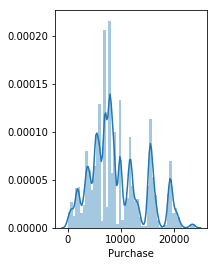

In [4]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Purchase']);

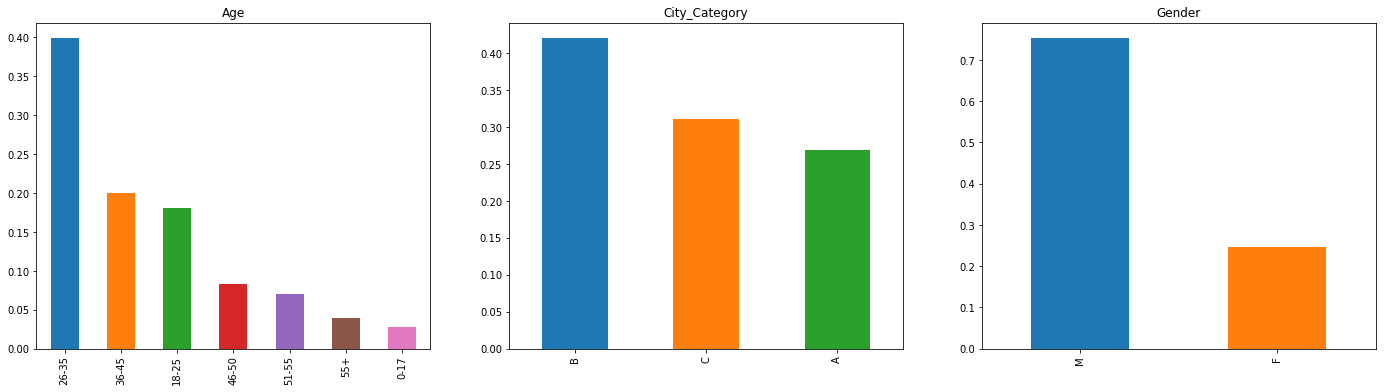

In [5]:
#Categorical Variable Analaysis
plt.figure(1)
plt.subplot(131)
train['Age'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Age')

plt.subplot(132)
train['City_Category'].value_counts(normalize=True).plot.bar(title= 'City_Category')

plt.subplot(133)
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')


plt.show()

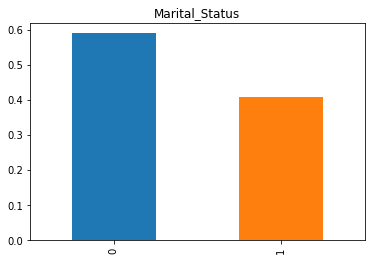

In [6]:
train['Marital_Status'].value_counts(normalize=True).plot.bar(title= 'Marital_Status')

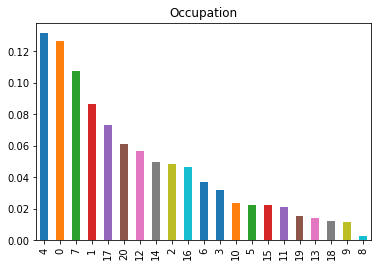

In [7]:
train['Occupation'].value_counts(normalize=True).plot.bar(title= 'Occupation')

In [8]:
#Analysis

# -Most of the buyers are mid-aged 
# -Most were from B city
# More men than women
# More unmarried than married
#More from occupation 4 and 00.

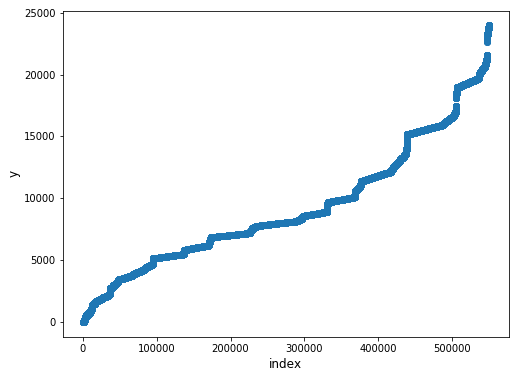

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.Purchase.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

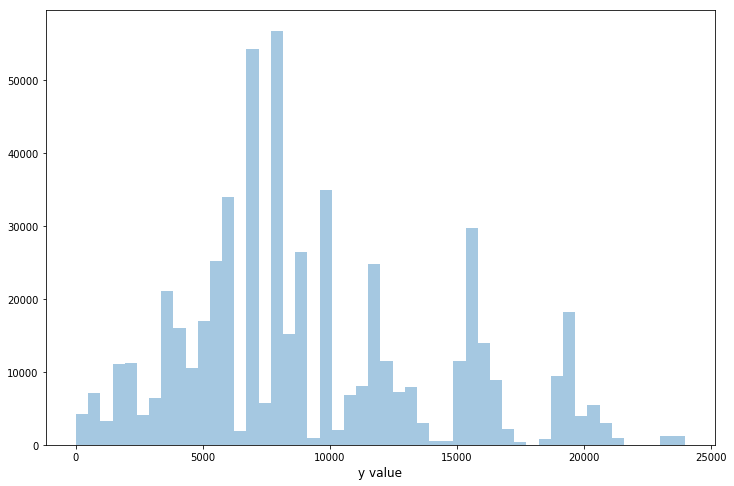

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(train.Purchase.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

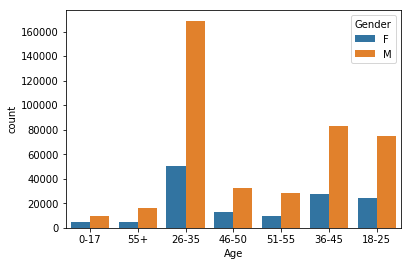

In [14]:
data.Marital_Status.value_counts()
table = pd.pivot_table(train, values='Purchase', index='Gender',columns = 'Age',
                      aggfunc=np.sum)
#table['Total']='b'
sum_F=0
sum_M = 0
sum_F = table.loc['F'][0]+table.loc['F'][1]+table.loc['F'][2]+table.loc['F'][3]+table.loc['F'][4]+table.loc['F'][5]+table.loc['F'][6]
sum_M = table.loc['M'][0]+table.loc['M'][1]+table.loc['M'][2]+table.loc['M'][3]+table.loc['M'][4]+table.loc['M'][5]+table.loc['M'][6]
table['Total']=0
table['Total']['F'] = sum_F
table['Total']['M'] = sum_M
table

sns.countplot(train['Age'],hue=train['Gender'])
#Male 26-35 visited the store more and spent more too